In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D

## Finding Eigen Values

(array([-1.,  6.]), array([[-0.92847669, -0.70710678],
       [ 0.37139068, -0.70710678]]))
[-1.  6.]
[12 12] [[-2.77538927]
 [-3.33552731]]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


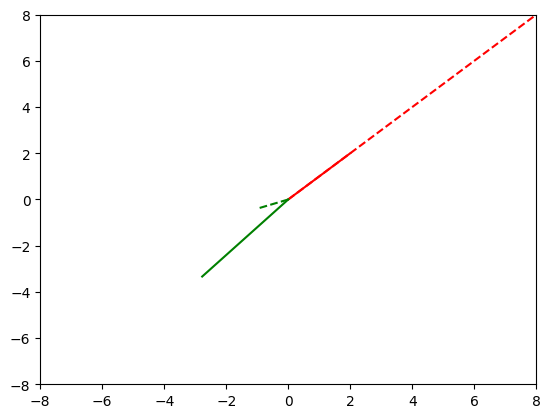

In [ ]:
# Matrix
A =[[1,5],
    [2,4]]

# Extract eigen values
eigvals= np.linalg.eig(A)
print(eigvals)
print(eigvals[0])

# specify two vectors
v1 = np.array([2,2]) # is an eigen vector --- any scaled(1,1)
v2 = np.random.randn(2,1)
v2 = v2 / np.linalg.norm(v2) # unlikely to be eigen vector

# compute Av
Av1 = A@v1
Av2 = A@v2
print(Av1,Av2)

plt.plot([0,v1[0]],[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')

plt.plot([0,Av2[0]],[0,Av2[1]],'g')
plt.plot([0,v2[0]],[0,v2[1]],'g--')

plt.axis([-8,8,-8,8])
plt.show()

In [ ]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])


[-3. -1.  3.]


### Code challenge: Eigen value of diag and triangular matrix

In [ ]:
# diag matrix
A = np.diag([2,1])
print(A)
print(np.linalg.eig(A)[0])

[[2 0]
 [0 1]]
[2. 1.]


In [ ]:
# NxN diagonal 
A = np.diag(np.arange(3,18))
print(np.linalg.eig(A)[0])

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.]


In [ ]:
# Tiangular matrix
A = np.triu(np.random.randn(4,4))#upper
print(A)
print(np.linalg.eig(A)[0])# diagonal elements are eigen value

[[ 2.05469055 -1.56287644  0.59388982 -1.06077176]
 [ 0.         -0.58686954 -0.10920072  0.74003157]
 [ 0.          0.         -0.7095008   0.08846464]
 [ 0.          0.          0.          1.61891694]]
[ 2.05469055 -0.58686954 -0.7095008   1.61891694]


In [ ]:
A = np.tril(np.random.randn(4,4))#lower
print(A)
print(np.linalg.eig(A)[0])# diagonal elements are eigen value (only order is different)

[[-0.83618417  0.          0.          0.        ]
 [-0.13562733 -0.52327105  0.          0.        ]
 [ 1.2426545   0.66859369 -0.70666022  0.        ]
 [ 0.36826016 -1.24938848  0.37574531 -0.40611308]]
[-0.40611308 -0.70666022 -0.52327105 -0.83618417]


### code challenge: Eigen values of random matrices

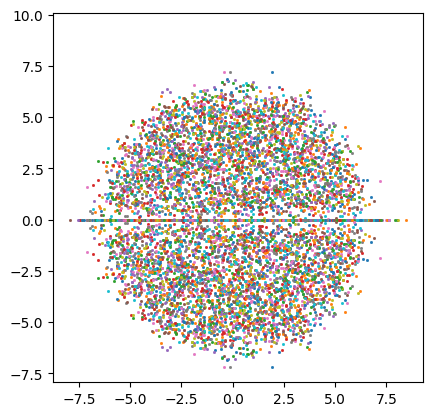

In [ ]:
# generate 40x40 matrices, 
# extract eigen values,
# plor them,
# repeat many times in the same plot

for i in range(200):
  A = np.random.randn(40,40)
  evals=np.linalg.eig(A)[0]
  plt.plot(np.real(evals), np.imag(evals), 's', markersize=1)

plt.axis('square')
plt.show()



```
Conclusion: 200 ota matrix ko real ra img part of eigenvalue plot gareko ho
           - eigen value live in circle (Diameter of circle depends on values of matrix)
           - st line is real part
```



## Finding Eigenvector

In [ ]:
# Matrix
A=[[1,2],
   [2,1]]

evals, evecs = np.linalg.eig(A)
print(evals)
print(evecs)

[ 3. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


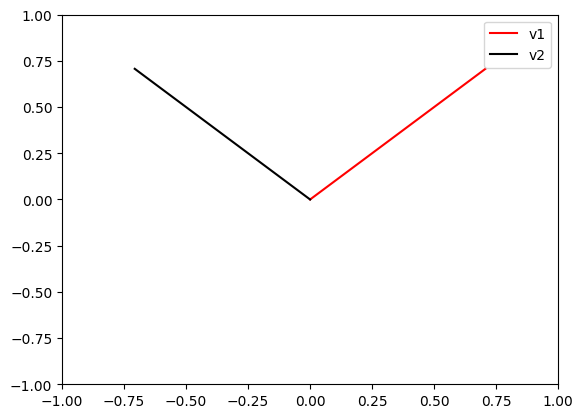

In [ ]:
# compute norm of each eigenvector
mag_v1 = np.sqrt(np.sum(np.square(evecs[:,0])))
mag_v2 = np.sqrt(np.sum(np.square(evecs[:,1])))

print(mag_v1, mag_v2)

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()

## Diagonalization

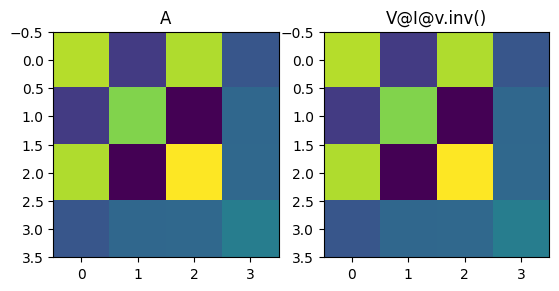

4.1939517884344953e-13


In [ ]:
# Eigen Decomposition
# make a symmetric matrix
A = np.round(10*np.random.randn(4,4))
A = A.T@A #(gives only realvalue eigen value)

# eigen decomposition
evals, evecs = np.linalg.eig(A)

# test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)

#plot
plt.subplot(121)
plt.imshow(A)
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.title('V@I@v.inv()')
plt.show()

#
recondiff = A- Ap

#reconstruction error
rmsA = np.sqrt(np.mean(np.square(np.reshape(recondiff,(1,-1)))))
print(rmsA)

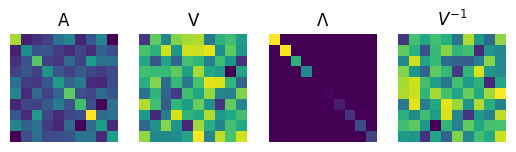

In [ ]:
## diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

# eigendecomposition
D,V = np.linalg.eig(A)

# show the results
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()

## Matrix power via Diagonalization

In [ ]:
A = np.random.randn(2,2)
print(np.linalg.matrix_power(A,3))# method 1

D,V = np.linalg.eig(A)

print(V @ np.linalg.matrix_power(np.diag(D),3) @ np.linalg.inv(V)) # method 2

[[ 0.02890022  0.15711124]
 [-0.04705941 -0.25578931]]
[[ 0.02890022  0.15711124]
 [-0.04705941 -0.25578931]]


[[ 0.93789739 -0.30816721  0.15931558]
 [-0.10388262 -0.68764955 -0.71857255]
 [-0.33099378 -0.6573972   0.67695793]]
[[-0.93789739  0.30816721  0.15931558]
 [ 0.10388262  0.68764955 -0.71857255]
 [ 0.33099378  0.6573972   0.67695793]]


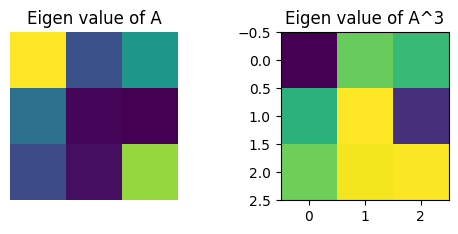

In [ ]:
## Eigen values of A and A^3
A = np.random.randn(3,3)
A = A.T@A

D, V = np.linalg.eig(A)
D3, V3 = np.linalg.eig(A@A@A)

print(V)
print(V3)

plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('Eigen value of A')

plt.subplot(222)
plt.imshow(V3)
plt.title('Eigen value of A^3')

plt.show()

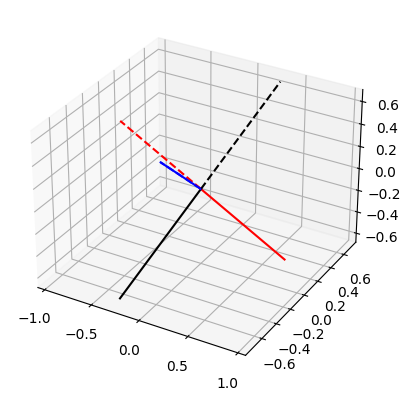

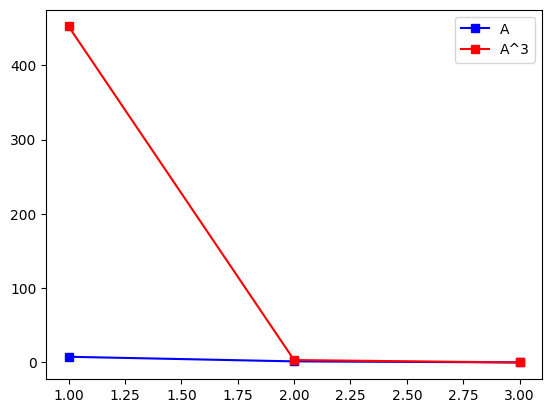

In [ ]:
# plot eigen vectors and eigen values
ax = plt.axes(projection='3d')

#plot eigen vectors of A 
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r')
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k')
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b')


#plot eigen vectors of A^3
ax.plot([0,V3[0,0]],[0,V3[1,0]],[0,V3[2,0]],'r--')
ax.plot([0,V3[0,1]],[0,V3[1,1]],[0,V3[2,1]],'k--')
ax.plot([0,V3[0,2]],[0,V3[1,2]],[0,V3[2,2]],'b--')

plt.show() # conclusion: Eigenvector ko sign has uncertainity. so eigen vector can overlap or can be in opposite side. (but eigen vector are same for A and A^3)

# show the eigen values
plt.plot([1,2,3],D,'bs-', label='A')
plt.plot([1,2,3],D3,'rs-', label='A^3')
plt.legend()
plt.show()

In [ ]:
print(D)
print(D3) # its just power of D^3


[7.67584835 1.48413291 0.04667324]
[4.52250607e+02 3.26902608e+00 1.01672564e-04]


### Code challenge: ED of matrix differences

In [ ]:
A = np.random.randn(5,5)
#A = A.T@A

B = np.random.randn(5,5)
#B = B.T@B

D1, V1 = np.linalg.eig(A-B)
D2, V2 = np.linalg.eig(A@A - A@B - B@A + B@B)

print(np.round(D1,3))
print(np.round(D2,3))
print(np.round(D1**2,3))#same as D2



[-1.735+1.866j -1.735-1.866j  0.428+1.2j    0.428-1.2j    2.777+0.j   ]
[ 7.713+0.j    -0.469+6.475j -0.469-6.475j -1.257+1.028j -1.257-1.028j]
[-0.469-6.475j -0.469+6.475j -1.257+1.028j -1.257-1.028j  7.713+0.j   ]


In [ ]:
# sort eigen values
sidx1 = np.argsort(abs(D1))
sidx2 = np.argsort(D2)
print(sidx1)
print(sidx2)

[2 3 0 1 4]
[4 3 2 1 0]


In [ ]:
# now the actual sorting
D1 = D1[sidx1]
D2 = D2[sidx2]
print(D1**2)
print(D2)

V1 = V1[:,sidx1]
V2 = V2[:,sidx2]

print(np.round(V1-V2,3)) #zero matrix or due to eigenvector uncertinity diff matrix

[-1.25739634+1.02841976j -1.25739634-1.02841976j -0.46924549-6.47486394j
 -0.46924549+6.47486394j  7.7129851 +0.j        ]
[-1.25739634-1.02841976j -1.25739634+1.02841976j -0.46924549-6.47486394j
 -0.46924549+6.47486394j  7.7129851 +0.j        ]
[[ 0.   +0.561j  0.   -0.561j -0.   -0.j    -0.   +0.j    -0.503+0.j   ]
 [ 0.   -0.17j   0.   +0.17j   0.   -0.j     0.   +0.j     0.59 +0.j   ]
 [-0.   +0.j    -0.   -0.j    -0.   +0.j    -0.   -0.j    -0.132+0.j   ]
 [ 0.   -0.186j  0.   +0.186j  0.   +0.j     0.   -0.j    -1.49 +0.j   ]
 [-0.   -0.119j -0.   +0.119j  0.   +0.j     0.   -0.j     1.079+0.j   ]]




```

If we do not take symmetric matrix , result are harder to interpret.
```



## Eigen vectors of repeated eigen values

In [ ]:
from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   ax = fig.gca(projection='3d')  
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='g'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .8)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

from mpl_toolkits.mplot3d import Axes3D

[[ 0.          0.7071002  -0.6882472 ]
 [ 0.          0.7071002   0.6882472 ]
 [ 1.          0.00431468 -0.22941573]]


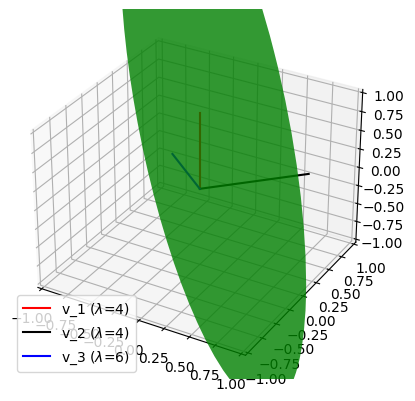

In [ ]:
### Note about this cell: you need first to run the following cell,
#   then come back and run this one!

# a matrix
A = [ [ 5,  -1,  0], 
      [-1,   5,  0],
      [1/3,-1/3, 4] ]

# its eigendecomposition
D,V = np.linalg.eig(A)

# sort eigenvalues
i = np.argsort(D)
D = D[i]
V = V[:,i]

print(V)
## plot eigenvectors
fig = plt.figure()
ax = plt.axes(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
plt.legend()

# plot subspace spanned by same-eigenvalued eigenvectors
plot_plane(ax, V[:,0],V[:,1],size=3)
# xx, yy = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))
# cp = np.cross(V[:,0],V[:,1])
# z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
# ax.plot_surface(xx,yy,z1,alpha=.4)

ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

### practice: 3d plotting 
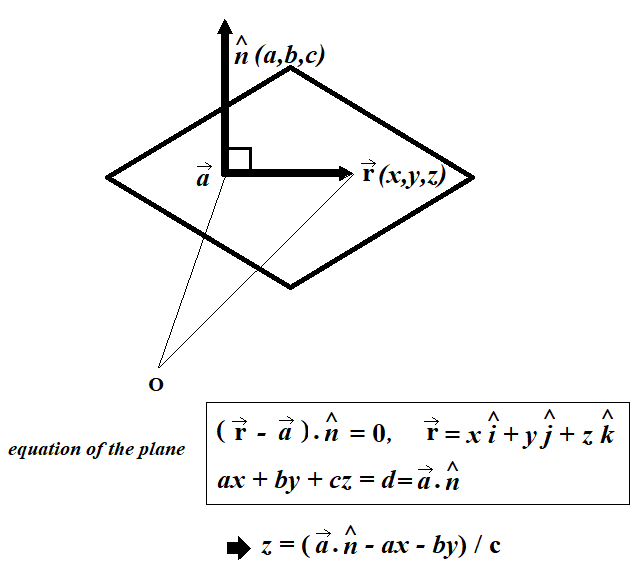

[[1 2]
 [3 4]
 [5 6]]
[-2  4 -2]


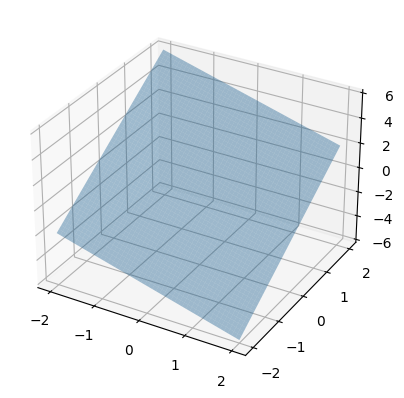

In [ ]:
V = np.array([[1,2],
              [3,4],
              [5,6]])
#V = np.random.randint(1,5,(3,2))
print(V)

ax = plt.axes(projection='3d')
xx,yy = np.meshgrid(np.linspace(-2,2),np.linspace(-2,2))
cp = np.cross(V[:,0],V[:,1])
print(cp)
zz=(-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,zz,alpha=.4)

plt.show()

## Eigen decomposition of symmetric matrices

In [ ]:
A = np.random.randn(14,14)

#lets make it symmetric
A = A@A.T

evals, evecs = np.linalg.eig(A)

norm1 = np.sqrt(sum(evecs**2))
print(norm1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


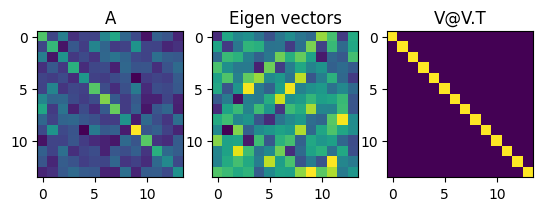

In [ ]:
# plot
plt.subplot(131)
plt.imshow(A)
plt.title('A')

plt.subplot(132)
plt.imshow(evecs)
plt.title('Eigen vectors')

plt.subplot(133)
plt.imshow(evecs@evecs.T) # hence proved. (its identity matrix)
plt.title('V@V.T')
plt.show()



### Code challenge: Reconstruct A matrix from eigen layers

In [ ]:
# create  symmetric matrix and take ED
m = 5
A = np.random.randn(5,5)
A = np.round(10*A.T@A)

D, V = np.linalg.eig(A)

# convert to column vector
v = V[:,2] #this is just an arry and doesnt have orientation
print(v) # its array so v.T doesnt work
print(np.reshape(V[:,2],(m,1))) # column vector banako

[ 0.15444128  0.4573177   0.79231304  0.36564547 -0.0745107 ]
[[ 0.15444128]
 [ 0.4573177 ]
 [ 0.79231304]
 [ 0.36564547]
 [-0.0745107 ]]


In [ ]:
# show that norm of the outer product of v_i = 1
op = np.outer(v,v)
print(op)

#another method
v = np.reshape(V[:,2],(m,1))
op2 = v*v.T #v has orientation so we can use * instead of @
print(op2)

print(np.linalg.norm(op))

[[ 0.02385211  0.07062873  0.12236584  0.05647075 -0.01150753]
 [ 0.07062873  0.20913948  0.36233878  0.16721615 -0.03407506]
 [ 0.12236584  0.36233878  0.62775996  0.28970567 -0.0590358 ]
 [ 0.05647075  0.16721615  0.28970567  0.13369661 -0.0272445 ]
 [-0.01150753 -0.03407506 -0.0590358  -0.0272445   0.00555184]]
[[ 0.02385211  0.07062873  0.12236584  0.05647075 -0.01150753]
 [ 0.07062873  0.20913948  0.36233878  0.16721615 -0.03407506]
 [ 0.12236584  0.36233878  0.62775996  0.28970567 -0.0590358 ]
 [ 0.05647075  0.16721615  0.28970567  0.13369661 -0.0272445 ]
 [-0.01150753 -0.03407506 -0.0590358  -0.0272445   0.00555184]]
1.0


In [ ]:
# create one layer of A as Lvv' and compute its norm
print(v*D[2]*v.T)
print(D[2])
print(np.linalg.norm(v*D[2]*v.T))

[[-0.00222696 -0.00659426 -0.0114247  -0.0052724   0.0010744 ]
 [-0.00659426 -0.01952633 -0.03382981 -0.01561216  0.00318142]
 [-0.0114247  -0.03382981 -0.05861089 -0.02704841  0.00551189]
 [-0.0052724  -0.01561216 -0.02704841 -0.0124826   0.00254369]
 [ 0.0010744   0.00318142  0.00551189  0.00254369 -0.00051835]]
-0.09336513107489423
0.09336513107489423


In [ ]:
# reconstruct A by sum over outer products
Arecon = np.zeros((m,m))

for i in range(m):
  v = np.reshape(V[:,i],(m,1))
  Arecon += v*D[i]*v.T
  print(Arecon)
  print(np.linalg.matrix_rank(Arecon))

print(A)
print(Arecon)
print(A-Arecon) #is zero

[[ 41.53230365  11.72573868 -35.55550483  48.89803544  19.92928096]
 [ 11.72573868   3.31050617 -10.03832009  13.80529215   5.62659713]
 [-35.55550483 -10.03832009  30.43881059 -41.86125456 -17.06131332]
 [ 48.89803544  13.80529215 -41.86125456  57.57007582  23.46372825]
 [ 19.92928096   5.62659713 -17.06131332  23.46372825   9.56306789]]
1
[[ 47.87982025   8.81781939 -34.52572095  46.73262373  15.56230851]
 [  8.81781939   4.64267986 -10.51008387  14.79730885   7.6271911 ]
 [-34.52572095 -10.51008387  30.60587669 -42.21255826 -17.76978533]
 [ 46.73262373  14.79730885 -42.21255826  58.30879116  24.95349092]
 [ 15.56230851   7.6271911  -17.76978533  24.95349092  12.56746309]]
2
[[ 47.8775933    8.81122513 -34.53714565  46.72735133  15.56338291]
 [  8.81122513   4.62315352 -10.54391368  14.78169669   7.63037252]
 [-34.53714565 -10.54391368  30.5472658  -42.23960667 -17.76427344]
 [ 46.72735133  14.78169669 -42.23960667  58.29630856  24.95603461]
 [ 15.56338291   7.63037252 -17.76427344  

### code challenge

In [ ]:
# trace(A) = sum(evals)
# det(A) = prod(evals)

A = np.random.randn(5,5)

D = np.linalg.eig(A)[0]

tr = np.matrix.trace(A)
dt = np.linalg.det(A)

print(tr,sum(D))
print(dt,np.prod(D))

-0.3453218843088113 (-0.34532188430881217+0j)
10.13009899370651 (10.130098993706483+3.5471672335401063e-16j)


In [ ]:
A = np.random.randn(7,5) @ np.random.randn(5,7)
D = np.linalg.eig(A)[0]

tr = np.matrix.trace(A)
dt = np.linalg.det(A)

print(tr,sum(D))
print(dt,np.prod(D))

-14.494106273526034 (-14.494106273526041+0j)
6.585965153254504e-29 (1.0033982898243238e-27-0j)


## Generalized Eigen Decomposition

In [ ]:
import scipy.linalg

# matrices
A = np.array([[3,2],
              [1,3]])
B = np.array([[1,1],
             [4,1]])

# GED
eigvals, eigvecs = scipy.linalg.eig(A,B)
print(eigvals)

# matrix-vector multiplication
Av = A@eigvecs[:,1]
Bv = B@eigvecs[:,1]
BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]



[-1.10727513+0.j  2.10727513+0.j]


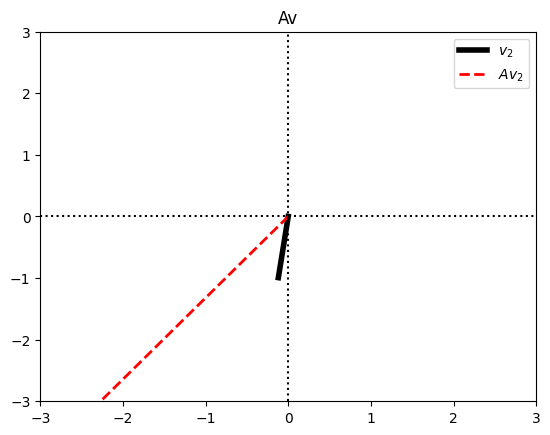

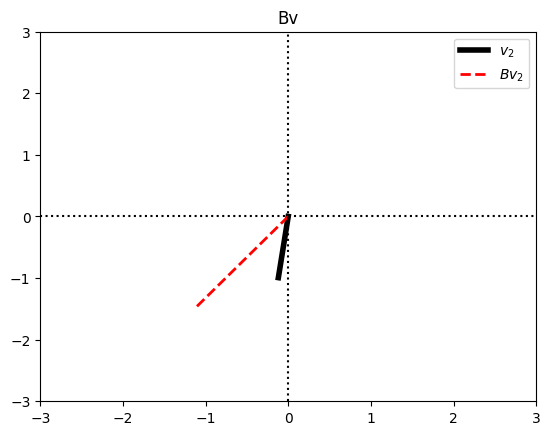

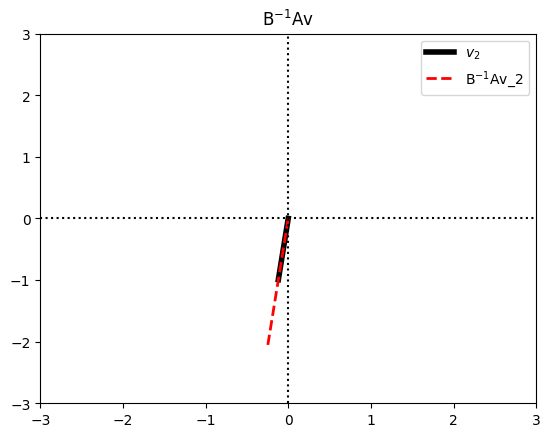

In [ ]:
plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Av[0]],[0,Av[1]],'r--',linewidth=2,label='$Av_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Av')
plt.show()

plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Bv[0]],[0,Bv[1]],'r--',linewidth=2,label='$Bv_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Bv')
plt.show()


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,BinvAv[0]],[0,BinvAv[1]],'r--',linewidth=2,label='B$^{-1}$Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('B$^{-1}$Av')
plt.show()

### Code challenge: GED in small and large matrices

[[-0.99794666 -0.52114511]
 [-0.0640505  -0.85346809]]
[ 4.64151119+0.j -0.48474268+0.j]
[ 4.64151119+0.j -0.48474268+0.j]


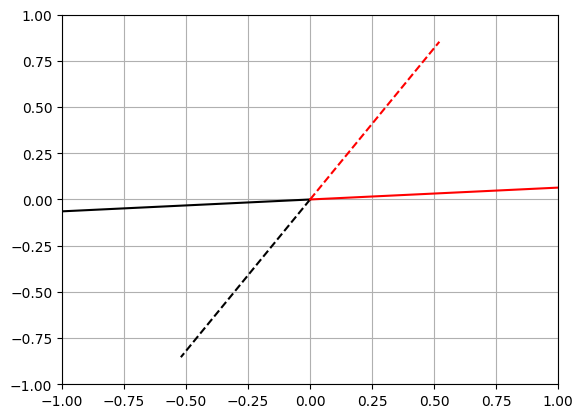

In [ ]:
#Goal: compaare eig(S,R) with eig(inv(R)*S)

#part 1: GED on 2x2 ,atrix. plotEigen vectors
S = np.random.randn(2,2)
R = np.random.randn(2,2)

Ls,Ws = scipy.linalg.eig(S,R)
Li,Wi = scipy.linalg.eig(np.linalg.inv(R)@S)
print(Ws)

#lets see eigen values
print(Ls)
print(Li)
# we saw both of them are same

#plot eigenvectors
plt.plot([0,Ws[0,0]],[0,Ws[1,0]],'k')
plt.plot([0,Ws[0,1]],[0,Ws[1,1]],'k--')
plt.plot([0,Wi[0,0]],[0,Wi[1,0]],'r')
plt.plot([0,Wi[0,1]],[0,Wi[1,1]],'r--')

plt.grid()
plt.axis([-1,1,-1,1])
plt.show()

# run several times to see different scenarios



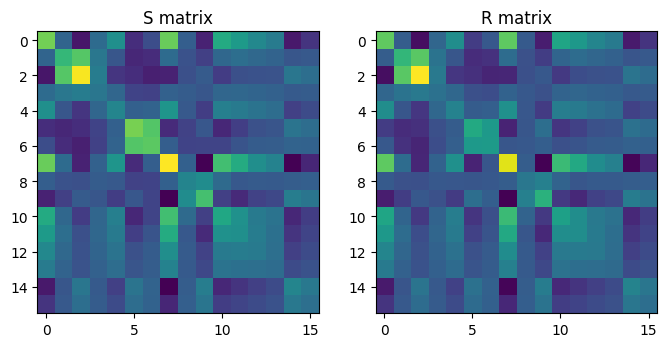

In [ ]:
# part 2 : with real data matrices. plot eigen values
from scipy.io import loadmat
data = loadmat('real_matrices.mat')
S = data['S']
R = data['R']

fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].imshow(S)
ax[0].set_title('S matrix')

ax[1].imshow(R)
ax[1].set_title('R matrix')

plt.show()

In [ ]:
print(np.shape(R))
print(np.linalg.matrix_rank(R))

(16, 16)
14


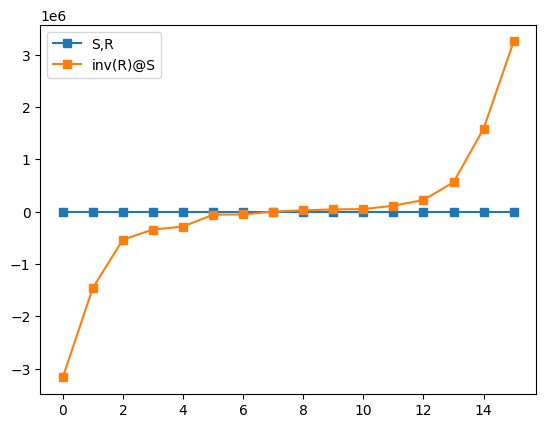

In [ ]:
Ls,Ws = scipy.linalg.eigh(S,R)
Li,Wi = scipy.linalg.eigh(np.linalg.inv(R)@S) #hermition # there is no inv of R

plt.plot(Ls, 's-', label='S,R')
plt.plot(Li, 's-', label='inv(R)@S') # it gives nonsense value when zoomed in
plt.legend()

#plt.ylim([0,3])# zoom in gareko

plt.show()